In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [53]:
#pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [56]:
df = pd.read_csv('data.csv',encoding = 'ISO-8859-1')

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
df.shape

(541909, 8)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [60]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


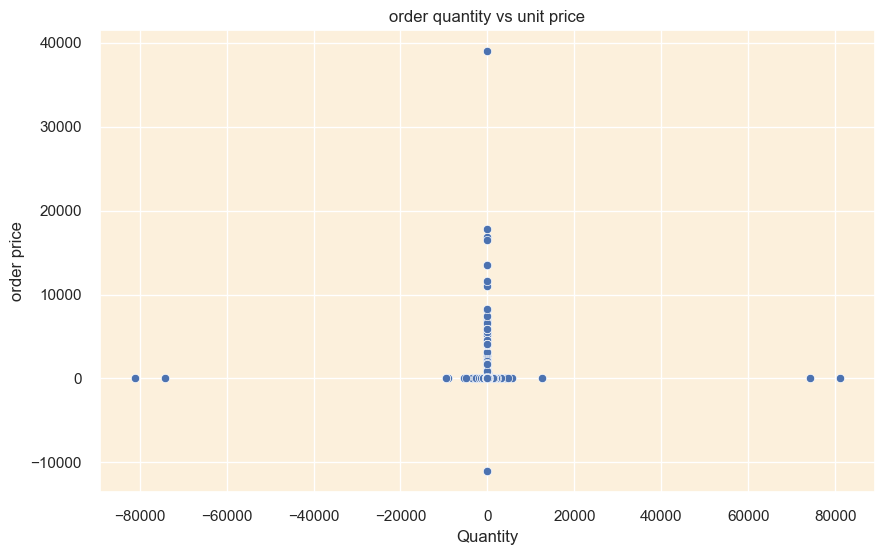

In [61]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Quantity', y = 'UnitPrice',data = df)
plt.title('order quantity vs unit price')
plt.xlabel('Quantity')
plt.ylabel('order price')
plt.show()

In [62]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [63]:
sns.set(rc = {'axes.facecolor':'#fcf0dc'},style = 'darkgrid')

In [64]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [65]:
df.describe(include = 'object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [66]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [67]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [68]:
df = df.dropna(subset = ['CustomerID','Description'])

In [69]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [70]:
df.isnull().sum().sum()

0

In [71]:
duplicate_rows =df[df.duplicated(keep = False)]
duplicate_rows_sorted = duplicate_rows.sort_values(by = ['InvoiceNo', 'StockCode', 'Description'])

In [72]:
duplicate_rows_sorted.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.shape[0]

401604

In [75]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'),'Cancelled','Completed')
cancelled_Transaction = df[df['Transaction_Status'] =='Cancelled']
print(cancelled_Transaction.head())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country Transaction_Status  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom          Cancelled  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom          Cancelled  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom          Cancelled  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom          Cancelled  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom          Cancelled  


In [76]:
cancelled_Transaction.describe().drop('CustomerID',axis = 1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [77]:
cancelled_percentage = (cancelled_Transaction.shape[0]/df.shape[0])*100

In [78]:
print(cancelled_percentage)

2.209141343213713


In [79]:
unique_stock_code = df['StockCode'].nunique()
print(f'The number of unique stock codes in the dataset is:{unique_stock_code}')

The number of unique stock codes in the dataset is:3684


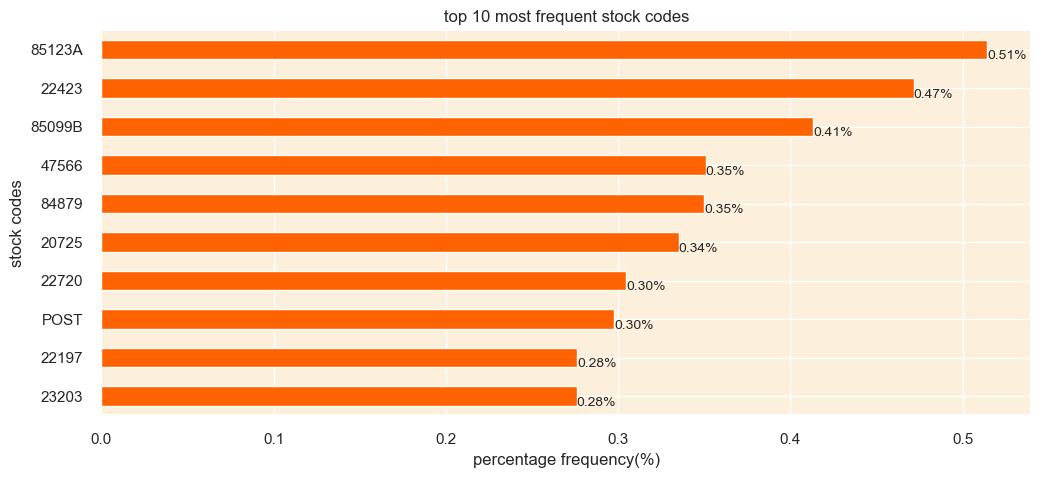

In [80]:
Top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10)*100
plt.figure(figsize = (12,5))
Top_10_stock_codes.plot(kind = 'barh',color ='#ff6200')

for index,value in enumerate(Top_10_stock_codes):
    plt.text(value, index+0.25,f'{value:.2f}%',fontsize = 10)

plt.title('top 10 most frequent stock codes')
plt.xlabel('percentage frequency(%)')
plt.ylabel('stock codes')
plt.gca().invert_yaxis()
plt.show()

In [81]:
#anomalous_stock_codes = [code for code in unique_stock_code if sum(c.isdisit() for c in str(code)) in (0,1)]
print(type(unique_stock_code))
anomalous_stock_codes = [code for code in unique_stock_code if sum(c.isdigit() for c in str(code)) in (0, 1)]
print('-'*22)
for code in anomalous_stock_codes:
    print(code)

<class 'int'>


TypeError: 'int' object is not iterable

In [46]:
unique_stock_code = str(unique_stock_code)

In [47]:
type(unique_stock_code)

str

In [49]:
type(df['unique_stock_code'])

KeyError: 'unique_stock_code'

In [50]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed
